# Programming Exercise 11 - Regression with Neural Networks and Keras

> * **Authors:** Gabriele **Accarino**, Marco **Chiarelli**
> * **Contacts:** gabriele.accarino@unisalento.it, marco.chiarelli@unisalento.it  

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense

from keras import optimizers
from keras import regularizers

from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston

np.random.seed(10)

Using TensorFlow backend.


# Multivariate Linear Regression with Keras

In [2]:
boston_dataset = load_boston()

print(boston_dataset.keys())
print(type(boston_dataset))

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
<class 'sklearn.utils.Bunch'>


In [3]:
features = boston_dataset.feature_names

In [4]:
target = boston_dataset.target
target_name = 'MEDV'
print(target)
print('\n')
print("The Target name is : {}".format(target_name))

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

## Create the Pandas Dataframe

In [5]:
boston = pd.DataFrame(boston_dataset.data, columns = features)
print(boston.shape)

(506, 13)


In [6]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


## Add the target variable to the Dataframe

In [7]:
boston[target_name] = boston_dataset.target

## Shuffle the dataset

In [8]:
boston = boston.sample(frac=1)

## The Pearson Correlation Matrix

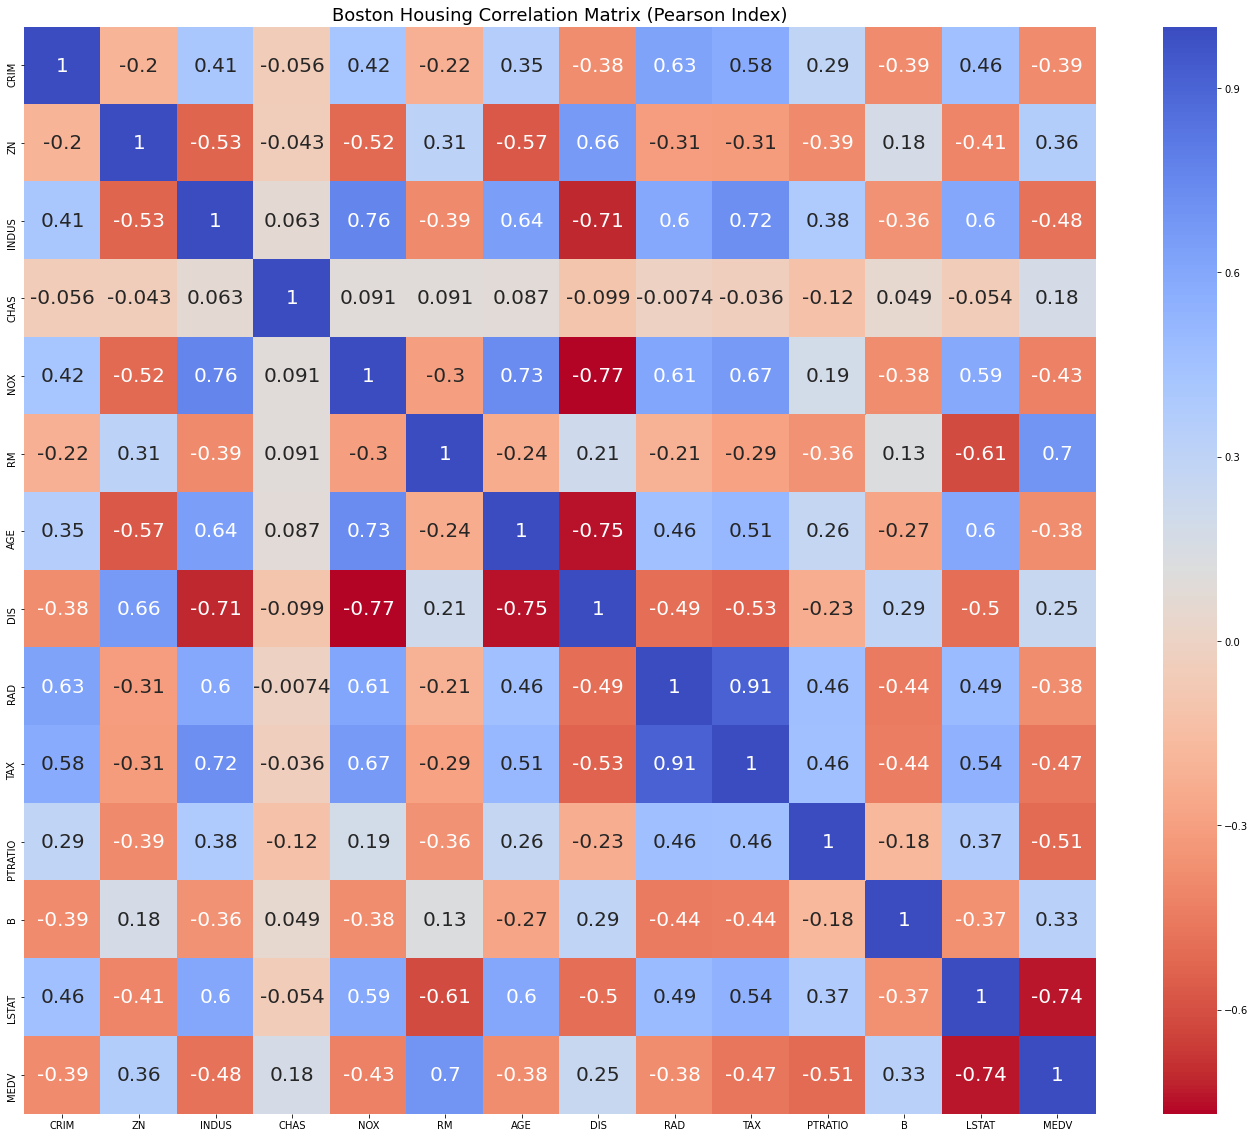

In [9]:
f, (ax1) = plt.subplots(1, 1, figsize=(24,20))
correlation_matrix = boston.corr(method='pearson')
sns.heatmap(correlation_matrix, cmap='coolwarm_r', annot = True, annot_kws={'size':20}, ax=ax1)
ax1.set_title("Boston Housing Correlation Matrix (Pearson Index)", fontsize=18)
plt.show()

## Select some features

In [10]:
X = boston.loc[:, ['RM', 'LSTAT']]
y = boston[target_name]

### Feature Scaling

In [11]:
def featureScaling(X):
    X_scaled = X
    
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    maxima = np.amax(X, axis = 0)
    minima = np.amin(X, axis = 0)
    
    for j in range(X.shape[1]):
        X_scaled[:,j] = (X[:,j]-mu[j])/sigma[j]
        #X_scaled[:,j] = (X[:,j]-mu[j])/(maxima[j] - minima[j])
    
    return X_scaled, mu, sigma, maxima, minima

## Feature Scaling

In [12]:
X_scaled, mu_X, sigma_X, maxima_X, minima_X = featureScaling(X.values)
y_scaled, mu_y, sigma_y, maxima_y, minima_y = featureScaling(y.values.reshape(-1,1))

## Supervised Learning (train 60%, val 20%, test 20%)

In [13]:
train_idx = int(X_scaled.shape[0] * 0.6)
val_idx = train_idx + int(X_scaled.shape[0] * 0.2)

X_train = X_scaled[: train_idx, :]
y_train = y_scaled[: train_idx]

X_val = X_scaled[train_idx : val_idx, :]
y_val = y_scaled[train_idx : val_idx]

X_test = X_scaled[: -val_idx , :]
y_test = y_scaled[: -val_idx]

In [14]:
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)

(303, 2) (303, 1) (101, 2) (101, 1) (102, 2) (102, 1)


# Multivariate Linear Regression model design in Keras

$$ \large h_{\theta}(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2$$

In [15]:
mlr = Sequential()
mlr.add(Dense(1, activation='linear', use_bias = True))

## Optimizer

In [16]:
sgd = optimizers.SGD(lr = 0.001, momentum = 0.0)

In [17]:
mlr.compile(loss='mean_squared_error', optimizer = sgd)

In [18]:
history_mlr = mlr.fit(X_train, y_train, epochs = 100, batch_size = 8, verbose = 1, validation_data = (X_val, y_val))

Train on 303 samples, validate on 101 samples
Epoch 1/100
303/303 [==============================] - 0s 497us/step - loss: 2.6657 - val_loss: 2.4096
Epoch 2/100
303/303 [==============================] - 0s 104us/step - loss: 2.2162 - val_loss: 2.0336
Epoch 3/100
303/303 [==============================] - 0s 115us/step - loss: 1.8685 - val_loss: 1.7370
Epoch 4/100
303/303 [==============================] - 0s 125us/step - loss: 1.5955 - val_loss: 1.5036
Epoch 5/100
303/303 [==============================] - 0s 123us/step - loss: 1.3801 - val_loss: 1.3182
Epoch 6/100
303/303 [==============================] - 0s 104us/step - loss: 1.2091 - val_loss: 1.1699
Epoch 7/100
303/303 [==============================] - 0s 104us/step - loss: 1.0735 - val_loss: 1.0510
Epoch 8/100
303/303 [==============================] - 0s 122us/step - loss: 0.9651 - val_loss: 0.9543
Epoch 9/100
303/303 [==============================] - 0s 113us/step - loss: 0.8773 - val_loss: 0.8776
Epoch 10/100
303/303 [=====

303/303 [==============================] - 0s 161us/step - loss: 0.3718 - val_loss: 0.3274
Epoch 80/100
303/303 [==============================] - 0s 147us/step - loss: 0.3716 - val_loss: 0.3268
Epoch 81/100
303/303 [==============================] - 0s 190us/step - loss: 0.3714 - val_loss: 0.3263
Epoch 82/100
303/303 [==============================] - 0s 190us/step - loss: 0.3711 - val_loss: 0.3257
Epoch 83/100
303/303 [==============================] - 0s 162us/step - loss: 0.3710 - val_loss: 0.3252
Epoch 84/100
303/303 [==============================] - 0s 153us/step - loss: 0.3707 - val_loss: 0.3247
Epoch 85/100
303/303 [==============================] - 0s 180us/step - loss: 0.3705 - val_loss: 0.3242
Epoch 86/100
303/303 [==============================] - 0s 191us/step - loss: 0.3704 - val_loss: 0.3237
Epoch 87/100
303/303 [==============================] - 0s 199us/step - loss: 0.3701 - val_loss: 0.3232
Epoch 88/100
303/303 [==============================] - 0s 171us/step - loss:

In [19]:
mlr.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


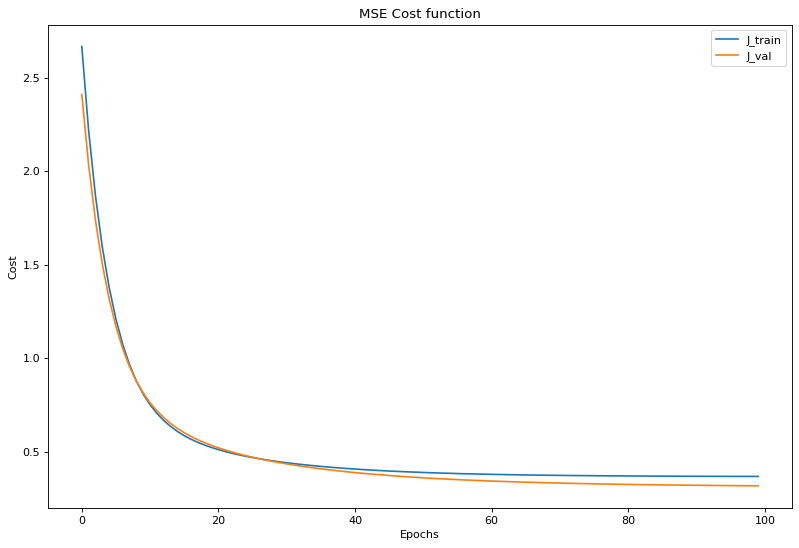

In [20]:
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

train_loss = history_mlr.history['loss']
val_loss = history_mlr.history['val_loss']
plt.plot(train_loss, label = 'J_train')
plt.plot(val_loss, label = 'J_val')
plt.title('MSE Cost function')
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.legend(loc='upper right')
plt.show()

In [21]:
yhat_mlr = mlr.predict(X_test, batch_size = 32)

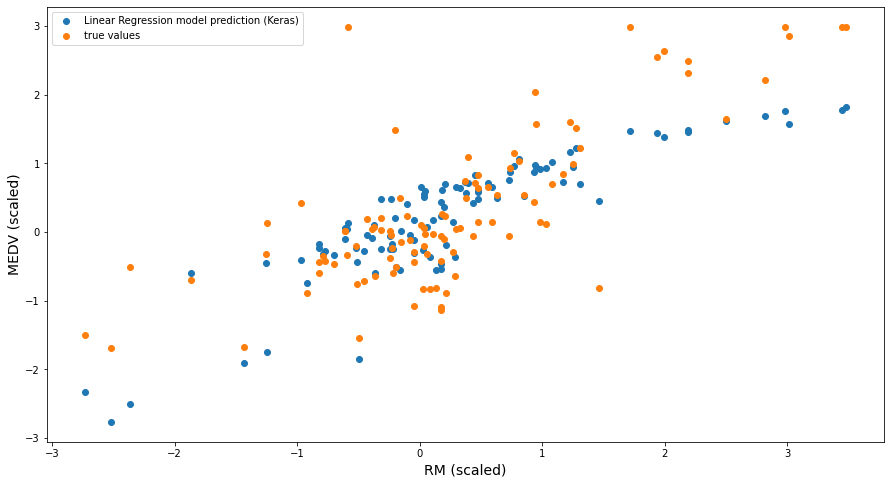

In [22]:
plt.figure(figsize =(15,8))
plt.scatter(X_test[:,0], yhat_mlr, label = 'Linear Regression model prediction (Keras)')
plt.scatter(X_test[:,0], y_test, label = 'true values')
plt.xlabel('RM (scaled)', fontsize = 14)
plt.ylabel('MEDV (scaled)', fontsize = 14)
plt.legend()
plt.show()

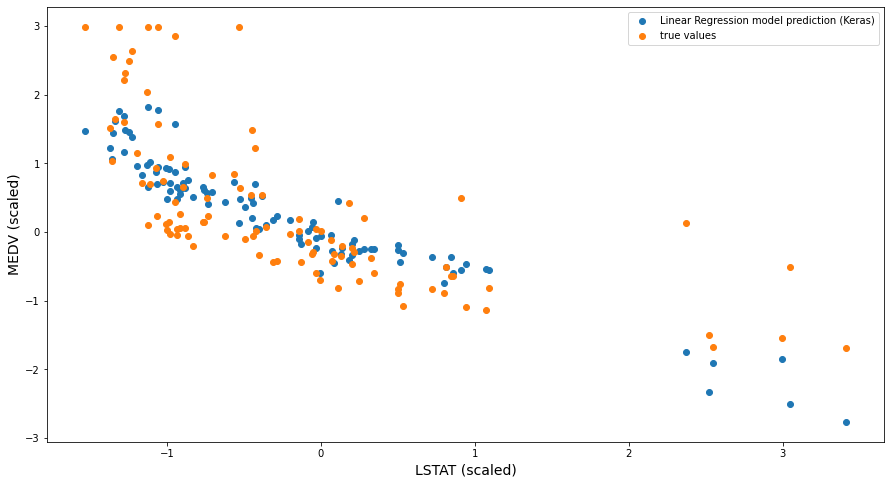

In [23]:
plt.figure(figsize =(15,8))
plt.scatter(X_test[:,1], yhat_mlr, label = 'Linear Regression model prediction (Keras)')
plt.scatter(X_test[:,1], y_test, label = 'true values')
plt.xlabel('LSTAT (scaled)', fontsize = 14)
plt.ylabel('MEDV (scaled)', fontsize = 14)
plt.legend()
plt.show()

# The Universal Approximation Theorem

> *The universal approximation theorem states that a feed-forward network with a single hidden layer containing a finite number of neurons can approximate continuous functions on compact subsets of $\mathbb{R}^n$, under mild assumptions on the activation function.*

> *One of the first versions of the theorem was proved by George Cybenko in 1989 for sigmoid activation functions.*

> *Kurt Hornik showed in 1991 that it is not the specific choice of the activation function, but rather the multilayer feedforward architecture itself which gives neural networks the potential of being universal approximators. The output units are always assumed to be linear.*

$$ \large y(x) = x^3 + x^2 - x - 1 $$

In [51]:
start = 0
end = 1
step_size = 0.01

# Generate Data
def cubic(x):
    return x**3 + x**2 - x - 1

def get_cubic_data(start,end,step_size):
    X = np.arange(start, end, step_size).reshape(-1,1)
    #X.shape = (len(X),1)
    y = np.array([cubic(X[i]) for i in range(len(X))]).reshape(-1,1)
    #y.shape = (len(y),1)
    return X, y

X, y = get_cubic_data(start, end, step_size)

In [52]:
print(X.shape)
print(y.shape)

(100, 1)
(100, 1)


Text(0.5, 1.0, 'Function to approximate')

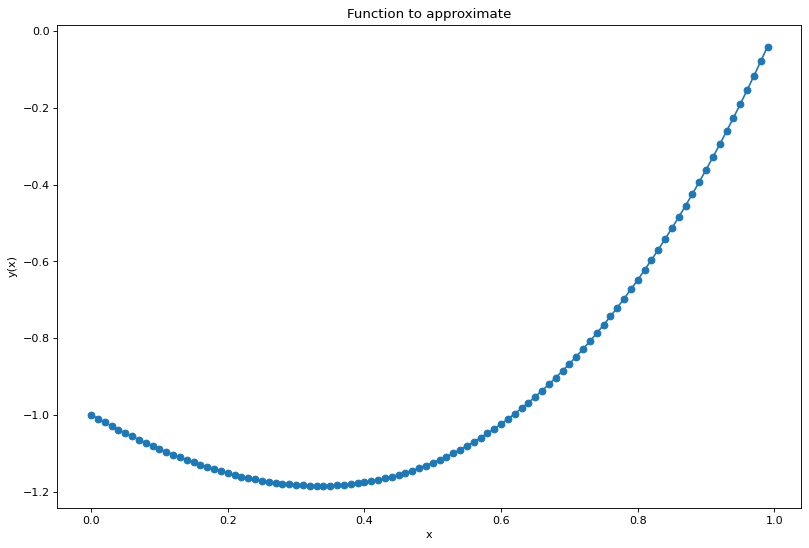

In [53]:
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

plt.plot(X, y, label = 'cubic function')
plt.scatter(X, y)
plt.ylabel('y(x)')
plt.xlabel('x')
plt.title('Function to approximate')

## Neural Network Design

In [70]:
hidden_neurons = 15
training_epochs = 1000

network = Sequential()
# hidden layer
network.add(Dense(hidden_neurons, input_shape = (X.shape[1],), activation='relu', use_bias = True))
network.add(Dense(hidden_neurons, activation='relu', use_bias = True))
# output layer
network.add(Dense(1, activation='linear', use_bias = True))

sgd = optimizers.SGD(lr = 0.01, momentum = 0.0)
network.compile(loss='mean_squared_error', optimizer = sgd)


history = network.fit(X, y, epochs = training_epochs, batch_size = 4, verbose = 1)

network.summary()

Epoch 1/1000
100/100 [==============================] - 0s 3ms/step - loss: 0.4716
Epoch 2/1000
100/100 [==============================] - 0s 342us/step - loss: 0.1673
Epoch 3/1000
100/100 [==============================] - 0s 406us/step - loss: 0.1220
Epoch 4/1000
100/100 [==============================] - 0s 459us/step - loss: 0.1031
Epoch 5/1000
100/100 [==============================] - 0s 408us/step - loss: 0.0911
Epoch 6/1000
100/100 [==============================] - 0s 429us/step - loss: 0.0801
Epoch 7/1000
100/100 [==============================] - 0s 380us/step - loss: 0.0712
Epoch 8/1000
100/100 [==============================] - 0s 383us/step - loss: 0.0633
Epoch 9/1000
100/100 [==============================] - 0s 401us/step - loss: 0.0578
Epoch 10/1000
100/100 [==============================] - 0s 352us/step - loss: 0.0510
Epoch 11/1000
100/100 [==============================] - 0s 335us/step - loss: 0.0457
Epoch 12/1000
100/100 [==============================] - 0s 369us

100/100 [==============================] - 0s 418us/step - loss: 0.0019
Epoch 97/1000
100/100 [==============================] - 0s 354us/step - loss: 0.0019
Epoch 98/1000
100/100 [==============================] - 0s 366us/step - loss: 0.0018
Epoch 99/1000
100/100 [==============================] - 0s 394us/step - loss: 0.0018
Epoch 100/1000
100/100 [==============================] - 0s 284us/step - loss: 0.0018
Epoch 101/1000
100/100 [==============================] - 0s 244us/step - loss: 0.0017
Epoch 102/1000
100/100 [==============================] - 0s 332us/step - loss: 0.0017
Epoch 103/1000
100/100 [==============================] - 0s 402us/step - loss: 0.0017
Epoch 104/1000
100/100 [==============================] - 0s 389us/step - loss: 0.0016
Epoch 105/1000
100/100 [==============================] - 0s 318us/step - loss: 0.0016
Epoch 106/1000
100/100 [==============================] - 0s 430us/step - loss: 0.0016
Epoch 107/1000
100/100 [==============================] - 0s 

100/100 [==============================] - 0s 337us/step - loss: 6.0030e-04
Epoch 189/1000
100/100 [==============================] - 0s 305us/step - loss: 6.2628e-04
Epoch 190/1000
100/100 [==============================] - 0s 308us/step - loss: 5.8274e-04
Epoch 191/1000
100/100 [==============================] - 0s 241us/step - loss: 6.0060e-04
Epoch 192/1000
100/100 [==============================] - 0s 243us/step - loss: 5.9291e-04
Epoch 193/1000
100/100 [==============================] - 0s 295us/step - loss: 5.8286e-04
Epoch 194/1000
100/100 [==============================] - 0s 231us/step - loss: 6.0078e-04
Epoch 195/1000
100/100 [==============================] - 0s 265us/step - loss: 5.7753e-04
Epoch 196/1000
100/100 [==============================] - 0s 254us/step - loss: 5.7914e-04
Epoch 197/1000
100/100 [==============================] - 0s 233us/step - loss: 5.5875e-04
Epoch 198/1000
100/100 [==============================] - 0s 215us/step - loss: 5.6893e-04
Epoch 199/1000

100/100 [==============================] - 0s 201us/step - loss: 3.1855e-04
Epoch 279/1000
100/100 [==============================] - 0s 300us/step - loss: 3.1706e-04
Epoch 280/1000
100/100 [==============================] - 0s 291us/step - loss: 3.1519e-04
Epoch 281/1000
100/100 [==============================] - 0s 236us/step - loss: 3.0295e-04
Epoch 282/1000
100/100 [==============================] - 0s 201us/step - loss: 3.1243e-04
Epoch 283/1000
100/100 [==============================] - 0s 211us/step - loss: 3.1368e-04
Epoch 284/1000
100/100 [==============================] - 0s 252us/step - loss: 3.1331e-04
Epoch 285/1000
100/100 [==============================] - 0s 312us/step - loss: 3.1404e-04
Epoch 286/1000
100/100 [==============================] - 0s 254us/step - loss: 3.0634e-04
Epoch 287/1000
100/100 [==============================] - 0s 220us/step - loss: 2.8627e-04
Epoch 288/1000
100/100 [==============================] - 0s 200us/step - loss: 2.9550e-04
Epoch 289/1000

100/100 [==============================] - 0s 198us/step - loss: 2.0410e-04
Epoch 369/1000
100/100 [==============================] - 0s 199us/step - loss: 2.0537e-04
Epoch 370/1000
100/100 [==============================] - 0s 225us/step - loss: 2.0235e-04
Epoch 371/1000
100/100 [==============================] - 0s 206us/step - loss: 2.0402e-04
Epoch 372/1000
100/100 [==============================] - 0s 198us/step - loss: 1.9975e-04
Epoch 373/1000
100/100 [==============================] - 0s 199us/step - loss: 2.0221e-04
Epoch 374/1000
100/100 [==============================] - 0s 226us/step - loss: 1.9514e-04
Epoch 375/1000
100/100 [==============================] - 0s 285us/step - loss: 2.0547e-04
Epoch 376/1000
100/100 [==============================] - 0s 243us/step - loss: 1.9596e-04
Epoch 377/1000
100/100 [==============================] - 0s 203us/step - loss: 2.0137e-04
Epoch 378/1000
100/100 [==============================] - 0s 202us/step - loss: 1.9746e-04
Epoch 379/1000

100/100 [==============================] - 0s 252us/step - loss: 1.5102e-04
Epoch 459/1000
100/100 [==============================] - 0s 217us/step - loss: 1.5041e-04
Epoch 460/1000
100/100 [==============================] - 0s 212us/step - loss: 1.4862e-04
Epoch 461/1000
100/100 [==============================] - 0s 209us/step - loss: 1.4884e-04
Epoch 462/1000
100/100 [==============================] - 0s 300us/step - loss: 1.5070e-04
Epoch 463/1000
100/100 [==============================] - 0s 274us/step - loss: 1.4516e-04
Epoch 464/1000
100/100 [==============================] - 0s 203us/step - loss: 1.4945e-04
Epoch 465/1000
100/100 [==============================] - 0s 215us/step - loss: 1.4451e-04
Epoch 466/1000
100/100 [==============================] - 0s 199us/step - loss: 1.4873e-04
Epoch 467/1000
100/100 [==============================] - 0s 225us/step - loss: 1.4639e-04
Epoch 468/1000
100/100 [==============================] - 0s 267us/step - loss: 1.4437e-04
Epoch 469/1000

100/100 [==============================] - 0s 191us/step - loss: 1.1613e-04
Epoch 549/1000
100/100 [==============================] - 0s 275us/step - loss: 1.1507e-04
Epoch 550/1000
100/100 [==============================] - 0s 271us/step - loss: 1.1812e-04
Epoch 551/1000
100/100 [==============================] - 0s 218us/step - loss: 1.2025e-04
Epoch 552/1000
100/100 [==============================] - 0s 201us/step - loss: 1.1239e-04
Epoch 553/1000
100/100 [==============================] - 0s 196us/step - loss: 1.1856e-04
Epoch 554/1000
100/100 [==============================] - 0s 193us/step - loss: 1.1669e-04
Epoch 555/1000
100/100 [==============================] - 0s 211us/step - loss: 1.1746e-04
Epoch 556/1000
100/100 [==============================] - 0s 188us/step - loss: 1.1308e-04
Epoch 557/1000
100/100 [==============================] - 0s 191us/step - loss: 1.1614e-04
Epoch 558/1000
100/100 [==============================] - 0s 204us/step - loss: 1.1312e-04
Epoch 559/1000

100/100 [==============================] - 0s 275us/step - loss: 9.8662e-05
Epoch 639/1000
100/100 [==============================] - 0s 208us/step - loss: 9.4948e-05
Epoch 640/1000
100/100 [==============================] - 0s 221us/step - loss: 9.5371e-05
Epoch 641/1000
100/100 [==============================] - 0s 186us/step - loss: 9.5721e-05
Epoch 642/1000
100/100 [==============================] - 0s 187us/step - loss: 9.4884e-05
Epoch 643/1000
100/100 [==============================] - 0s 286us/step - loss: 9.4849e-05
Epoch 644/1000
100/100 [==============================] - 0s 257us/step - loss: 9.6623e-05
Epoch 645/1000
100/100 [==============================] - 0s 235us/step - loss: 9.5224e-05
Epoch 646/1000
100/100 [==============================] - 0s 213us/step - loss: 9.7645e-05
Epoch 647/1000
100/100 [==============================] - 0s 192us/step - loss: 9.6506e-05
Epoch 648/1000
100/100 [==============================] - 0s 229us/step - loss: 9.3661e-05
Epoch 649/1000

100/100 [==============================] - 0s 228us/step - loss: 8.0986e-05
Epoch 729/1000
100/100 [==============================] - 0s 208us/step - loss: 7.8064e-05
Epoch 730/1000
100/100 [==============================] - 0s 208us/step - loss: 8.2306e-05
Epoch 731/1000
100/100 [==============================] - 0s 311us/step - loss: 8.1684e-05
Epoch 732/1000
100/100 [==============================] - 0s 228us/step - loss: 8.1414e-05
Epoch 733/1000
100/100 [==============================] - 0s 276us/step - loss: 8.0962e-05
Epoch 734/1000
100/100 [==============================] - 0s 233us/step - loss: 7.7873e-05
Epoch 735/1000
100/100 [==============================] - 0s 221us/step - loss: 8.0220e-05
Epoch 736/1000
100/100 [==============================] - 0s 296us/step - loss: 7.9766e-05
Epoch 737/1000
100/100 [==============================] - 0s 304us/step - loss: 8.0666e-05
Epoch 738/1000
100/100 [==============================] - 0s 231us/step - loss: 8.0234e-05
Epoch 739/1000

100/100 [==============================] - 0s 208us/step - loss: 7.0406e-05
Epoch 819/1000
100/100 [==============================] - 0s 209us/step - loss: 6.9503e-05
Epoch 820/1000
100/100 [==============================] - 0s 200us/step - loss: 7.0633e-05
Epoch 821/1000
100/100 [==============================] - 0s 259us/step - loss: 7.1782e-05
Epoch 822/1000
100/100 [==============================] - 0s 257us/step - loss: 7.1259e-05
Epoch 823/1000
100/100 [==============================] - 0s 250us/step - loss: 7.0655e-05
Epoch 824/1000
100/100 [==============================] - 0s 281us/step - loss: 6.8790e-05
Epoch 825/1000
100/100 [==============================] - 0s 303us/step - loss: 7.0054e-05
Epoch 826/1000
100/100 [==============================] - 0s 324us/step - loss: 7.0853e-05
Epoch 827/1000
100/100 [==============================] - 0s 320us/step - loss: 7.0105e-05
Epoch 828/1000
100/100 [==============================] - 0s 260us/step - loss: 6.9977e-05
Epoch 829/1000

100/100 [==============================] - 0s 364us/step - loss: 6.2195e-05
Epoch 909/1000
100/100 [==============================] - 0s 328us/step - loss: 6.4184e-05
Epoch 910/1000
100/100 [==============================] - 0s 401us/step - loss: 6.0856e-05
Epoch 911/1000
100/100 [==============================] - 0s 379us/step - loss: 6.1296e-05
Epoch 912/1000
100/100 [==============================] - 0s 313us/step - loss: 6.3188e-05
Epoch 913/1000
100/100 [==============================] - 0s 333us/step - loss: 6.2277e-05
Epoch 914/1000
100/100 [==============================] - 0s 418us/step - loss: 6.1564e-05
Epoch 915/1000
100/100 [==============================] - 0s 248us/step - loss: 6.1886e-05
Epoch 916/1000
100/100 [==============================] - 0s 231us/step - loss: 6.2416e-05
Epoch 917/1000
100/100 [==============================] - 0s 304us/step - loss: 6.0243e-05
Epoch 918/1000
100/100 [==============================] - 0s 411us/step - loss: 6.2098e-05
Epoch 919/1000

100/100 [==============================] - 0s 340us/step - loss: 5.6939e-05
Epoch 999/1000
100/100 [==============================] - 0s 438us/step - loss: 5.5959e-05
Epoch 1000/1000
100/100 [==============================] - 0s 423us/step - loss: 5.6747e-05
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 15)                30        
_________________________________________________________________
dense_25 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 16        
Total params: 286
Trainable params: 286
Non-trainable params: 0
_________________________________________________________________


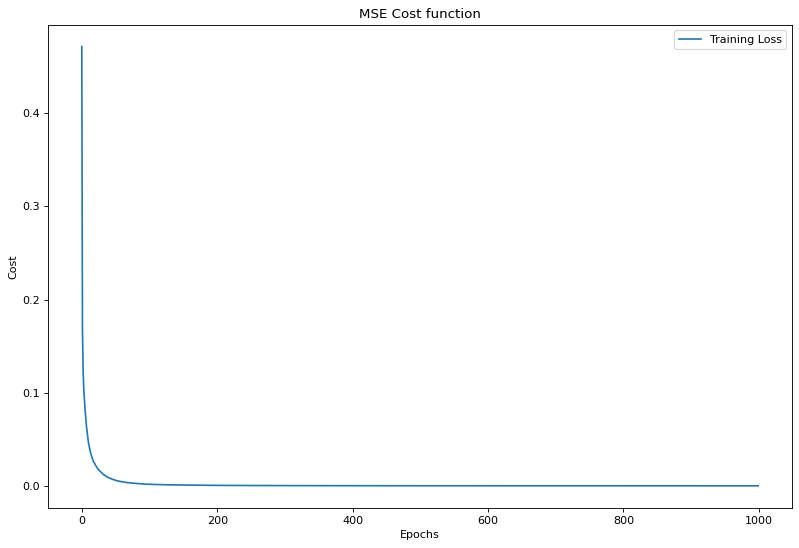

In [71]:
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

loss = history.history['loss']
plt.plot(loss)
plt.title('MSE Cost function')
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.legend(['Training Loss'], loc='upper right')
plt.show()

In [72]:
yhat = network.predict(X, verbose = 1)
print(yhat.shape)

100/100 [==============================] - 0s 1ms/step
(100, 1)


Text(0.5, 1.0, 'Universal Approximation Theorem - Proof')

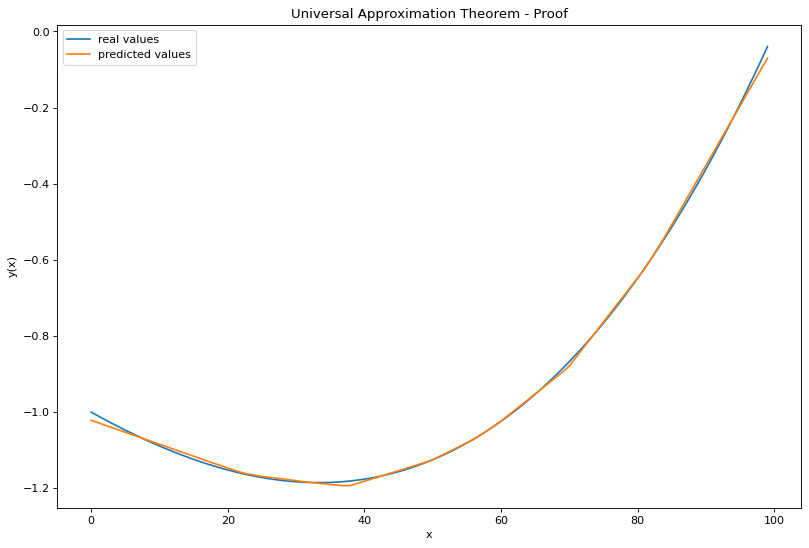

In [73]:
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

plt.plot(y, label = 'real values')
plt.plot(yhat, label = 'predicted values')
plt.ylabel('y(x)')
plt.xlabel('x')
plt.legend(loc = 'best')
plt.title('Universal Approximation Theorem - Proof')

## Calculate the Root Mean Squared Error

$$\large RMSE = \sqrt \frac{\sum_{i=1}^{m} (\hat y_{(i)} - y_{(i)})^2}{m}$$

In [ ]:
rmse = np.sqrt(mean_squared_error(y, yhat))
print(rmse)

# Logistic Regression

In [74]:
from sklearn import datasets

In [78]:
iris = datasets.load_iris()
X = iris.data  # we only take the first two features.
y = iris.target.reshape(-1,1)

print(X.shape, y.shape)

(150, 4) (150, 1)


## Feature scaling

In [95]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))
X_scaled = scaler.fit_transform(X)

In [98]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [97]:
X_scaled

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [79]:
neg = y[:, :] == 0 # negative class
pos = y[:, :] == 1

In [104]:
X_neg = X[:50, :]
X_pos = X[-50:, :]

X_scaled_neg = X_scaled[:50, :]
X_scaled_pos = X_scaled[-50:, :]

y_neg = y[:50,:]
y_pos = y[-50:,:]

X_bc = X_scaled[:100,:]
y_bc = y[:100,:]

print(X_neg.shape, X_pos.shape, X_scaled_neg.shape, X_scaled_pos.shape, y_neg.shape, y_pos.shape, X_bc.shape, y_bc.shape)

(50, 4) (50, 4) (50, 4) (50, 4) (50, 1) (50, 1) (100, 4) (100, 1)


# Neural Network Design for Binary Classification

In [105]:
bc = Sequential()
bc.add(Dense(4, activation = 'sigmoid', input_shape = (X_bc.shape[1],), use_bias = True))
bc.add(Dense(1, activation = 'sigmoid', use_bias = True))

In [118]:
sgd = optimizers.SGD(lr = 0.01, momentum = 0.0)
bc.compile(loss = 'binary_crossentropy', optimizer = sgd, metrics=['accuracy']) #bce

In [119]:
history = bc.fit(X_bc, y_bc, epochs = 1000, batch_size = 4, verbose = 1)

Epoch 1/1000
100/100 [==============================] - 0s 4ms/step - loss: 0.0137 - acc: 1.0000
Epoch 2/1000
100/100 [==============================] - 0s 410us/step - loss: 0.0137 - acc: 1.0000
Epoch 3/1000
100/100 [==============================] - 0s 434us/step - loss: 0.0137 - acc: 1.0000
Epoch 4/1000
100/100 [==============================] - 0s 426us/step - loss: 0.0136 - acc: 1.0000
Epoch 5/1000
100/100 [==============================] - 0s 453us/step - loss: 0.0136 - acc: 1.0000
Epoch 6/1000
100/100 [==============================] - 0s 421us/step - loss: 0.0136 - acc: 1.0000
Epoch 7/1000
100/100 [==============================] - 0s 439us/step - loss: 0.0136 - acc: 1.0000
Epoch 8/1000
100/100 [==============================] - 0s 332us/step - loss: 0.0136 - acc: 1.0000
Epoch 9/1000
100/100 [==============================] - 0s 350us/step - loss: 0.0135 - acc: 1.0000
Epoch 10/1000
100/100 [==============================] - 0s 411us/step - loss: 0.0135 - acc: 1.0000
Epoch 11/10

100/100 [==============================] - 0s 424us/step - loss: 0.0123 - acc: 1.0000
Epoch 84/1000
100/100 [==============================] - 0s 355us/step - loss: 0.0123 - acc: 1.0000
Epoch 85/1000
100/100 [==============================] - 0s 326us/step - loss: 0.0123 - acc: 1.0000
Epoch 86/1000
100/100 [==============================] - 0s 372us/step - loss: 0.0123 - acc: 1.0000
Epoch 87/1000
100/100 [==============================] - 0s 324us/step - loss: 0.0123 - acc: 1.0000
Epoch 88/1000
100/100 [==============================] - 0s 287us/step - loss: 0.0122 - acc: 1.0000
Epoch 89/1000
100/100 [==============================] - 0s 273us/step - loss: 0.0122 - acc: 1.0000
Epoch 90/1000
100/100 [==============================] - 0s 331us/step - loss: 0.0122 - acc: 1.0000
Epoch 91/1000
100/100 [==============================] - 0s 317us/step - loss: 0.0122 - acc: 1.0000
Epoch 92/1000
100/100 [==============================] - 0s 293us/step - loss: 0.0122 - acc: 1.0000
Epoch 93/1000


100/100 [==============================] - 0s 510us/step - loss: 0.0112 - acc: 1.0000
Epoch 165/1000
100/100 [==============================] - 0s 411us/step - loss: 0.0112 - acc: 1.0000
Epoch 166/1000
100/100 [==============================] - 0s 342us/step - loss: 0.0112 - acc: 1.0000
Epoch 167/1000
100/100 [==============================] - 0s 476us/step - loss: 0.0111 - acc: 1.0000
Epoch 168/1000
100/100 [==============================] - 0s 359us/step - loss: 0.0111 - acc: 1.0000
Epoch 169/1000
100/100 [==============================] - 0s 359us/step - loss: 0.0111 - acc: 1.0000
Epoch 170/1000
100/100 [==============================] - 0s 488us/step - loss: 0.0111 - acc: 1.0000
Epoch 171/1000
100/100 [==============================] - 0s 462us/step - loss: 0.0111 - acc: 1.0000
Epoch 172/1000
100/100 [==============================] - 0s 357us/step - loss: 0.0111 - acc: 1.0000
Epoch 173/1000
100/100 [==============================] - 0s 298us/step - loss: 0.0111 - acc: 1.0000
Epoch

100/100 [==============================] - 0s 312us/step - loss: 0.0102 - acc: 1.0000
Epoch 246/1000
100/100 [==============================] - 0s 302us/step - loss: 0.0102 - acc: 1.0000
Epoch 247/1000
100/100 [==============================] - 0s 221us/step - loss: 0.0102 - acc: 1.0000
Epoch 248/1000
100/100 [==============================] - 0s 239us/step - loss: 0.0102 - acc: 1.0000
Epoch 249/1000
100/100 [==============================] - 0s 221us/step - loss: 0.0102 - acc: 1.0000
Epoch 250/1000
100/100 [==============================] - 0s 248us/step - loss: 0.0102 - acc: 1.0000
Epoch 251/1000
100/100 [==============================] - 0s 343us/step - loss: 0.0102 - acc: 1.0000
Epoch 252/1000
100/100 [==============================] - 0s 229us/step - loss: 0.0102 - acc: 1.0000
Epoch 253/1000
100/100 [==============================] - 0s 256us/step - loss: 0.0102 - acc: 1.0000
Epoch 254/1000
100/100 [==============================] - 0s 259us/step - loss: 0.0101 - acc: 1.0000
Epoch

100/100 [==============================] - 0s 345us/step - loss: 0.0094 - acc: 1.0000
Epoch 327/1000
100/100 [==============================] - 0s 290us/step - loss: 0.0094 - acc: 1.0000
Epoch 328/1000
100/100 [==============================] - 0s 301us/step - loss: 0.0094 - acc: 1.0000
Epoch 329/1000
100/100 [==============================] - 0s 316us/step - loss: 0.0094 - acc: 1.0000
Epoch 330/1000
100/100 [==============================] - 0s 351us/step - loss: 0.0094 - acc: 1.0000
Epoch 331/1000
100/100 [==============================] - 0s 288us/step - loss: 0.0094 - acc: 1.0000
Epoch 332/1000
100/100 [==============================] - 0s 253us/step - loss: 0.0094 - acc: 1.0000
Epoch 333/1000
100/100 [==============================] - 0s 252us/step - loss: 0.0094 - acc: 1.0000
Epoch 334/1000
100/100 [==============================] - 0s 276us/step - loss: 0.0094 - acc: 1.0000
Epoch 335/1000
100/100 [==============================] - 0s 400us/step - loss: 0.0093 - acc: 1.0000
Epoch

100/100 [==============================] - 0s 259us/step - loss: 0.0087 - acc: 1.0000
Epoch 408/1000
100/100 [==============================] - 0s 309us/step - loss: 0.0087 - acc: 1.0000
Epoch 409/1000
100/100 [==============================] - 0s 335us/step - loss: 0.0087 - acc: 1.0000
Epoch 410/1000
100/100 [==============================] - 0s 252us/step - loss: 0.0087 - acc: 1.0000
Epoch 411/1000
100/100 [==============================] - 0s 254us/step - loss: 0.0087 - acc: 1.0000
Epoch 412/1000
100/100 [==============================] - 0s 274us/step - loss: 0.0087 - acc: 1.0000
Epoch 413/1000
100/100 [==============================] - 0s 335us/step - loss: 0.0087 - acc: 1.0000
Epoch 414/1000
100/100 [==============================] - 0s 281us/step - loss: 0.0087 - acc: 1.0000
Epoch 415/1000
100/100 [==============================] - 0s 248us/step - loss: 0.0087 - acc: 1.0000
Epoch 416/1000
100/100 [==============================] - 0s 226us/step - loss: 0.0087 - acc: 1.0000
Epoch

100/100 [==============================] - 0s 440us/step - loss: 0.0081 - acc: 1.0000
Epoch 489/1000
100/100 [==============================] - 0s 502us/step - loss: 0.0081 - acc: 1.0000
Epoch 490/1000
100/100 [==============================] - 0s 499us/step - loss: 0.0081 - acc: 1.0000
Epoch 491/1000
100/100 [==============================] - 0s 461us/step - loss: 0.0081 - acc: 1.0000
Epoch 492/1000
100/100 [==============================] - 0s 438us/step - loss: 0.0081 - acc: 1.0000
Epoch 493/1000
100/100 [==============================] - 0s 463us/step - loss: 0.0081 - acc: 1.0000
Epoch 494/1000
100/100 [==============================] - 0s 560us/step - loss: 0.0081 - acc: 1.0000
Epoch 495/1000
100/100 [==============================] - 0s 654us/step - loss: 0.0081 - acc: 1.0000
Epoch 496/1000
100/100 [==============================] - 0s 791us/step - loss: 0.0081 - acc: 1.0000
Epoch 497/1000
100/100 [==============================] - 0s 497us/step - loss: 0.0081 - acc: 1.0000
Epoch

100/100 [==============================] - 0s 385us/step - loss: 0.0076 - acc: 1.0000
Epoch 570/1000
100/100 [==============================] - 0s 403us/step - loss: 0.0076 - acc: 1.0000
Epoch 571/1000
100/100 [==============================] - 0s 497us/step - loss: 0.0076 - acc: 1.0000
Epoch 572/1000
100/100 [==============================] - 0s 341us/step - loss: 0.0076 - acc: 1.0000
Epoch 573/1000
100/100 [==============================] - 0s 353us/step - loss: 0.0076 - acc: 1.0000
Epoch 574/1000
100/100 [==============================] - 0s 497us/step - loss: 0.0076 - acc: 1.0000
Epoch 575/1000
100/100 [==============================] - 0s 601us/step - loss: 0.0076 - acc: 1.0000
Epoch 576/1000
100/100 [==============================] - 0s 474us/step - loss: 0.0076 - acc: 1.0000
Epoch 577/1000
100/100 [==============================] - 0s 387us/step - loss: 0.0076 - acc: 1.0000
Epoch 578/1000
100/100 [==============================] - 0s 381us/step - loss: 0.0075 - acc: 1.0000
Epoch

100/100 [==============================] - 0s 460us/step - loss: 0.0071 - acc: 1.0000
Epoch 651/1000
100/100 [==============================] - 0s 381us/step - loss: 0.0071 - acc: 1.0000
Epoch 652/1000
100/100 [==============================] - 0s 569us/step - loss: 0.0071 - acc: 1.0000
Epoch 653/1000
100/100 [==============================] - 0s 370us/step - loss: 0.0071 - acc: 1.0000
Epoch 654/1000
100/100 [==============================] - 0s 335us/step - loss: 0.0071 - acc: 1.0000
Epoch 655/1000
100/100 [==============================] - 0s 469us/step - loss: 0.0071 - acc: 1.0000
Epoch 656/1000
100/100 [==============================] - 0s 662us/step - loss: 0.0071 - acc: 1.0000
Epoch 657/1000
100/100 [==============================] - 0s 694us/step - loss: 0.0071 - acc: 1.0000
Epoch 658/1000
100/100 [==============================] - 0s 507us/step - loss: 0.0071 - acc: 1.0000
Epoch 659/1000
100/100 [==============================] - 0s 448us/step - loss: 0.0071 - acc: 1.0000
Epoch

100/100 [==============================] - 0s 299us/step - loss: 0.0067 - acc: 1.0000
Epoch 732/1000
100/100 [==============================] - 0s 383us/step - loss: 0.0067 - acc: 1.0000
Epoch 733/1000
100/100 [==============================] - 0s 312us/step - loss: 0.0067 - acc: 1.0000
Epoch 734/1000
100/100 [==============================] - 0s 286us/step - loss: 0.0067 - acc: 1.0000
Epoch 735/1000
100/100 [==============================] - 0s 280us/step - loss: 0.0067 - acc: 1.0000
Epoch 736/1000
100/100 [==============================] - 0s 248us/step - loss: 0.0067 - acc: 1.0000
Epoch 737/1000
100/100 [==============================] - 0s 247us/step - loss: 0.0067 - acc: 1.0000
Epoch 738/1000
100/100 [==============================] - 0s 347us/step - loss: 0.0067 - acc: 1.0000
Epoch 739/1000
100/100 [==============================] - 0s 518us/step - loss: 0.0067 - acc: 1.0000
Epoch 740/1000
100/100 [==============================] - 0s 484us/step - loss: 0.0067 - acc: 1.0000
Epoch

100/100 [==============================] - 0s 479us/step - loss: 0.0063 - acc: 1.0000
Epoch 813/1000
100/100 [==============================] - 0s 391us/step - loss: 0.0063 - acc: 1.0000
Epoch 814/1000
100/100 [==============================] - 0s 479us/step - loss: 0.0063 - acc: 1.0000
Epoch 815/1000
100/100 [==============================] - 0s 297us/step - loss: 0.0063 - acc: 1.0000
Epoch 816/1000
100/100 [==============================] - 0s 349us/step - loss: 0.0063 - acc: 1.0000
Epoch 817/1000
100/100 [==============================] - 0s 454us/step - loss: 0.0063 - acc: 1.0000
Epoch 818/1000
100/100 [==============================] - 0s 429us/step - loss: 0.0063 - acc: 1.0000
Epoch 819/1000
100/100 [==============================] - 0s 448us/step - loss: 0.0063 - acc: 1.0000
Epoch 820/1000
100/100 [==============================] - 0s 443us/step - loss: 0.0063 - acc: 1.0000
Epoch 821/1000
100/100 [==============================] - 0s 392us/step - loss: 0.0063 - acc: 1.0000
Epoch

100/100 [==============================] - 0s 528us/step - loss: 0.0060 - acc: 1.0000
Epoch 894/1000
100/100 [==============================] - 0s 391us/step - loss: 0.0060 - acc: 1.0000
Epoch 895/1000
100/100 [==============================] - 0s 418us/step - loss: 0.0060 - acc: 1.0000
Epoch 896/1000
100/100 [==============================] - 0s 451us/step - loss: 0.0060 - acc: 1.0000
Epoch 897/1000
100/100 [==============================] - 0s 318us/step - loss: 0.0060 - acc: 1.0000
Epoch 898/1000
100/100 [==============================] - 0s 335us/step - loss: 0.0060 - acc: 1.0000
Epoch 899/1000
100/100 [==============================] - 0s 362us/step - loss: 0.0060 - acc: 1.0000
Epoch 900/1000
100/100 [==============================] - 0s 318us/step - loss: 0.0060 - acc: 1.0000
Epoch 901/1000
100/100 [==============================] - 0s 261us/step - loss: 0.0060 - acc: 1.0000
Epoch 902/1000
100/100 [==============================] - 0s 244us/step - loss: 0.0060 - acc: 1.0000
Epoch

100/100 [==============================] - 0s 313us/step - loss: 0.0057 - acc: 1.0000
Epoch 975/1000
100/100 [==============================] - 0s 249us/step - loss: 0.0057 - acc: 1.0000
Epoch 976/1000
100/100 [==============================] - 0s 227us/step - loss: 0.0057 - acc: 1.0000
Epoch 977/1000
100/100 [==============================] - 0s 218us/step - loss: 0.0057 - acc: 1.0000
Epoch 978/1000
100/100 [==============================] - 0s 304us/step - loss: 0.0057 - acc: 1.0000
Epoch 979/1000
100/100 [==============================] - 0s 295us/step - loss: 0.0057 - acc: 1.0000
Epoch 980/1000
100/100 [==============================] - 0s 244us/step - loss: 0.0057 - acc: 1.0000
Epoch 981/1000
100/100 [==============================] - 0s 247us/step - loss: 0.0057 - acc: 1.0000
Epoch 982/1000
100/100 [==============================] - 0s 230us/step - loss: 0.0057 - acc: 1.0000
Epoch 983/1000
100/100 [==============================] - 0s 327us/step - loss: 0.0057 - acc: 1.0000
Epoch

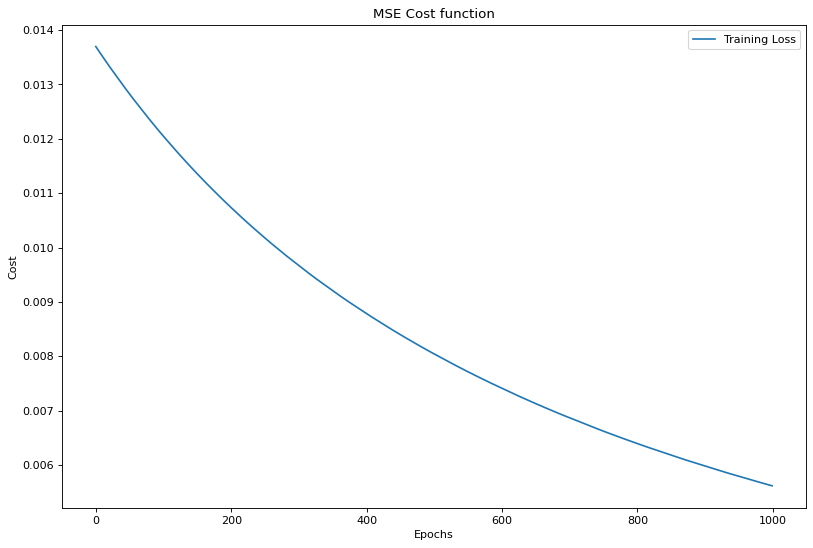

In [120]:
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

loss = history.history['loss']
plt.plot(loss)
plt.title('MSE Cost function')
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.legend(['Training Loss'], loc='upper right')
plt.show()

In [121]:
yhat = bc.predict(X_bc[-4:, :])

In [122]:
yhat

array([[0.9935278 ],
       [0.9960944 ],
       [0.96489066],
       [0.9940906 ]], dtype=float32)

In [123]:
y_bc[-4:,:]

array([[1],
       [1],
       [1],
       [1]])

## ReLU

In [125]:
bc_2 = Sequential()
bc_2.add(Dense(4, activation = 'relu', input_shape = (X_bc.shape[1],), use_bias = True))
bc_2.add(Dense(1, activation = 'sigmoid', use_bias = True))

In [126]:
sgd = optimizers.SGD(lr = 0.01, momentum = 0.0)
bc_2.compile(loss = 'binary_crossentropy', optimizer = sgd, metrics=['accuracy']) #bce

In [127]:
history_2 = bc_2.fit(X[:100,:], y[:100,:], epochs = 1000, batch_size = 4, verbose = 1)

Epoch 1/1000
100/100 [==============================] - 0s 4ms/step - loss: 1.1766 - acc: 0.5000
Epoch 2/1000
100/100 [==============================] - 0s 404us/step - loss: 0.7961 - acc: 0.5000
Epoch 3/1000
100/100 [==============================] - 0s 449us/step - loss: 0.7344 - acc: 0.0900
Epoch 4/1000
100/100 [==============================] - 0s 325us/step - loss: 0.7029 - acc: 0.3600
Epoch 5/1000
100/100 [==============================] - 0s 373us/step - loss: 0.6819 - acc: 0.5000
Epoch 6/1000
100/100 [==============================] - 0s 445us/step - loss: 0.6634 - acc: 0.5000
Epoch 7/1000
100/100 [==============================] - 0s 355us/step - loss: 0.6460 - acc: 0.5000
Epoch 8/1000
100/100 [==============================] - 0s 343us/step - loss: 0.6273 - acc: 0.5000
Epoch 9/1000
100/100 [==============================] - 0s 374us/step - loss: 0.6053 - acc: 0.5000
Epoch 10/1000
100/100 [==============================] - 0s 431us/step - loss: 0.5779 - acc: 0.5400
Epoch 11/10

100/100 [==============================] - 0s 489us/step - loss: 0.0741 - acc: 1.0000
Epoch 84/1000
100/100 [==============================] - 0s 442us/step - loss: 0.0731 - acc: 1.0000
Epoch 85/1000
100/100 [==============================] - 0s 439us/step - loss: 0.0720 - acc: 1.0000
Epoch 86/1000
100/100 [==============================] - 0s 448us/step - loss: 0.0711 - acc: 1.0000
Epoch 87/1000
100/100 [==============================] - 0s 358us/step - loss: 0.0702 - acc: 1.0000
Epoch 88/1000
100/100 [==============================] - 0s 362us/step - loss: 0.0692 - acc: 1.0000
Epoch 89/1000
100/100 [==============================] - 0s 411us/step - loss: 0.0683 - acc: 1.0000
Epoch 90/1000
100/100 [==============================] - 0s 658us/step - loss: 0.0674 - acc: 1.0000
Epoch 91/1000
100/100 [==============================] - 0s 488us/step - loss: 0.0665 - acc: 1.0000
Epoch 92/1000
100/100 [==============================] - 0s 384us/step - loss: 0.0658 - acc: 1.0000
Epoch 93/1000


100/100 [==============================] - 0s 329us/step - loss: 0.0336 - acc: 1.0000
Epoch 165/1000
100/100 [==============================] - 0s 318us/step - loss: 0.0334 - acc: 1.0000
Epoch 166/1000
100/100 [==============================] - 0s 397us/step - loss: 0.0332 - acc: 1.0000
Epoch 167/1000
100/100 [==============================] - 0s 413us/step - loss: 0.0330 - acc: 1.0000
Epoch 168/1000
100/100 [==============================] - 0s 317us/step - loss: 0.0327 - acc: 1.0000
Epoch 169/1000
100/100 [==============================] - 0s 303us/step - loss: 0.0325 - acc: 1.0000
Epoch 170/1000
100/100 [==============================] - 0s 381us/step - loss: 0.0323 - acc: 1.0000
Epoch 171/1000
100/100 [==============================] - 0s 354us/step - loss: 0.0321 - acc: 1.0000
Epoch 172/1000
100/100 [==============================] - 0s 317us/step - loss: 0.0319 - acc: 1.0000
Epoch 173/1000
100/100 [==============================] - 0s 287us/step - loss: 0.0316 - acc: 1.0000
Epoch

100/100 [==============================] - 0s 282us/step - loss: 0.0214 - acc: 1.0000
Epoch 246/1000
100/100 [==============================] - 0s 302us/step - loss: 0.0213 - acc: 1.0000
Epoch 247/1000
100/100 [==============================] - 0s 375us/step - loss: 0.0212 - acc: 1.0000
Epoch 248/1000
100/100 [==============================] - 0s 342us/step - loss: 0.0211 - acc: 1.0000
Epoch 249/1000
100/100 [==============================] - 0s 287us/step - loss: 0.0210 - acc: 1.0000
Epoch 250/1000
100/100 [==============================] - 0s 297us/step - loss: 0.0209 - acc: 1.0000
Epoch 251/1000
100/100 [==============================] - 0s 334us/step - loss: 0.0208 - acc: 1.0000
Epoch 252/1000
100/100 [==============================] - 0s 352us/step - loss: 0.0207 - acc: 1.0000
Epoch 253/1000
100/100 [==============================] - 0s 307us/step - loss: 0.0206 - acc: 1.0000
Epoch 254/1000
100/100 [==============================] - 0s 264us/step - loss: 0.0205 - acc: 1.0000
Epoch

100/100 [==============================] - 0s 408us/step - loss: 0.0156 - acc: 1.0000
Epoch 327/1000
100/100 [==============================] - 0s 554us/step - loss: 0.0155 - acc: 1.0000
Epoch 328/1000
100/100 [==============================] - 0s 330us/step - loss: 0.0155 - acc: 1.0000
Epoch 329/1000
100/100 [==============================] - 0s 362us/step - loss: 0.0154 - acc: 1.0000
Epoch 330/1000
100/100 [==============================] - 0s 482us/step - loss: 0.0154 - acc: 1.0000
Epoch 331/1000
100/100 [==============================] - 0s 488us/step - loss: 0.0153 - acc: 1.0000
Epoch 332/1000
100/100 [==============================] - 0s 498us/step - loss: 0.0153 - acc: 1.0000
Epoch 333/1000
100/100 [==============================] - 0s 656us/step - loss: 0.0152 - acc: 1.0000
Epoch 334/1000
100/100 [==============================] - 0s 501us/step - loss: 0.0152 - acc: 1.0000
Epoch 335/1000
100/100 [==============================] - 0s 528us/step - loss: 0.0151 - acc: 1.0000
Epoch

100/100 [==============================] - 0s 503us/step - loss: 0.0122 - acc: 1.0000
Epoch 408/1000
100/100 [==============================] - 0s 522us/step - loss: 0.0122 - acc: 1.0000
Epoch 409/1000
100/100 [==============================] - 0s 462us/step - loss: 0.0121 - acc: 1.0000
Epoch 410/1000
100/100 [==============================] - 0s 428us/step - loss: 0.0121 - acc: 1.0000
Epoch 411/1000
100/100 [==============================] - 0s 452us/step - loss: 0.0121 - acc: 1.0000
Epoch 412/1000
100/100 [==============================] - 0s 448us/step - loss: 0.0121 - acc: 1.0000
Epoch 413/1000
100/100 [==============================] - 0s 416us/step - loss: 0.0120 - acc: 1.0000
Epoch 414/1000
100/100 [==============================] - 0s 408us/step - loss: 0.0120 - acc: 1.0000
Epoch 415/1000
100/100 [==============================] - 0s 361us/step - loss: 0.0120 - acc: 1.0000
Epoch 416/1000
100/100 [==============================] - 0s 421us/step - loss: 0.0119 - acc: 1.0000
Epoch

100/100 [==============================] - 0s 291us/step - loss: 0.0100 - acc: 1.0000
Epoch 489/1000
100/100 [==============================] - 0s 246us/step - loss: 0.0100 - acc: 1.0000
Epoch 490/1000
100/100 [==============================] - 0s 275us/step - loss: 0.0100 - acc: 1.0000
Epoch 491/1000
100/100 [==============================] - 0s 331us/step - loss: 0.0100 - acc: 1.0000
Epoch 492/1000
100/100 [==============================] - 0s 263us/step - loss: 0.0099 - acc: 1.0000
Epoch 493/1000
100/100 [==============================] - 0s 248us/step - loss: 0.0099 - acc: 1.0000
Epoch 494/1000
100/100 [==============================] - 0s 261us/step - loss: 0.0099 - acc: 1.0000
Epoch 495/1000
100/100 [==============================] - 0s 233us/step - loss: 0.0099 - acc: 1.0000
Epoch 496/1000
100/100 [==============================] - 0s 250us/step - loss: 0.0099 - acc: 1.0000
Epoch 497/1000
100/100 [==============================] - 0s 223us/step - loss: 0.0098 - acc: 1.0000
Epoch

100/100 [==============================] - 0s 274us/step - loss: 0.0085 - acc: 1.0000
Epoch 570/1000
100/100 [==============================] - 0s 311us/step - loss: 0.0085 - acc: 1.0000
Epoch 571/1000
100/100 [==============================] - 0s 320us/step - loss: 0.0085 - acc: 1.0000
Epoch 572/1000
100/100 [==============================] - 0s 277us/step - loss: 0.0085 - acc: 1.0000
Epoch 573/1000
100/100 [==============================] - 0s 265us/step - loss: 0.0085 - acc: 1.0000
Epoch 574/1000
100/100 [==============================] - 0s 282us/step - loss: 0.0084 - acc: 1.0000
Epoch 575/1000
100/100 [==============================] - 0s 351us/step - loss: 0.0084 - acc: 1.0000
Epoch 576/1000
100/100 [==============================] - 0s 296us/step - loss: 0.0084 - acc: 1.0000
Epoch 577/1000
100/100 [==============================] - 0s 277us/step - loss: 0.0084 - acc: 1.0000
Epoch 578/1000
100/100 [==============================] - 0s 256us/step - loss: 0.0084 - acc: 1.0000
Epoch

100/100 [==============================] - 0s 614us/step - loss: 0.0074 - acc: 1.0000
Epoch 651/1000
100/100 [==============================] - 0s 525us/step - loss: 0.0074 - acc: 1.0000
Epoch 652/1000
100/100 [==============================] - 0s 659us/step - loss: 0.0074 - acc: 1.0000
Epoch 653/1000
100/100 [==============================] - 0s 441us/step - loss: 0.0074 - acc: 1.0000
Epoch 654/1000
100/100 [==============================] - 0s 562us/step - loss: 0.0073 - acc: 1.0000
Epoch 655/1000
100/100 [==============================] - 0s 525us/step - loss: 0.0073 - acc: 1.0000
Epoch 656/1000
100/100 [==============================] - 0s 497us/step - loss: 0.0073 - acc: 1.0000
Epoch 657/1000
100/100 [==============================] - 0s 498us/step - loss: 0.0073 - acc: 1.0000
Epoch 658/1000
100/100 [==============================] - 0s 484us/step - loss: 0.0073 - acc: 1.0000
Epoch 659/1000
100/100 [==============================] - 0s 697us/step - loss: 0.0073 - acc: 1.0000
Epoch

100/100 [==============================] - 0s 285us/step - loss: 0.0065 - acc: 1.0000
Epoch 732/1000
100/100 [==============================] - 0s 329us/step - loss: 0.0065 - acc: 1.0000
Epoch 733/1000
100/100 [==============================] - 0s 404us/step - loss: 0.0065 - acc: 1.0000
Epoch 734/1000
100/100 [==============================] - 0s 310us/step - loss: 0.0065 - acc: 1.0000
Epoch 735/1000
100/100 [==============================] - 0s 285us/step - loss: 0.0065 - acc: 1.0000
Epoch 736/1000
100/100 [==============================] - 0s 347us/step - loss: 0.0065 - acc: 1.0000
Epoch 737/1000
100/100 [==============================] - 0s 345us/step - loss: 0.0065 - acc: 1.0000
Epoch 738/1000
100/100 [==============================] - 0s 310us/step - loss: 0.0065 - acc: 1.0000
Epoch 739/1000
100/100 [==============================] - 0s 308us/step - loss: 0.0064 - acc: 1.0000
Epoch 740/1000
100/100 [==============================] - 0s 353us/step - loss: 0.0064 - acc: 1.0000
Epoch

100/100 [==============================] - 0s 291us/step - loss: 0.0058 - acc: 1.0000
Epoch 813/1000
100/100 [==============================] - 0s 253us/step - loss: 0.0058 - acc: 1.0000
Epoch 814/1000
100/100 [==============================] - 0s 264us/step - loss: 0.0058 - acc: 1.0000
Epoch 815/1000
100/100 [==============================] - 0s 267us/step - loss: 0.0058 - acc: 1.0000
Epoch 816/1000
100/100 [==============================] - 0s 239us/step - loss: 0.0058 - acc: 1.0000
Epoch 817/1000
100/100 [==============================] - 0s 242us/step - loss: 0.0058 - acc: 1.0000
Epoch 818/1000
100/100 [==============================] - 0s 227us/step - loss: 0.0058 - acc: 1.0000
Epoch 819/1000
100/100 [==============================] - 0s 246us/step - loss: 0.0058 - acc: 1.0000
Epoch 820/1000
100/100 [==============================] - 0s 275us/step - loss: 0.0058 - acc: 1.0000
Epoch 821/1000
100/100 [==============================] - 0s 361us/step - loss: 0.0058 - acc: 1.0000
Epoch

100/100 [==============================] - 0s 314us/step - loss: 0.0053 - acc: 1.0000
Epoch 894/1000
100/100 [==============================] - 0s 333us/step - loss: 0.0053 - acc: 1.0000
Epoch 895/1000
100/100 [==============================] - 0s 276us/step - loss: 0.0053 - acc: 1.0000
Epoch 896/1000
100/100 [==============================] - 0s 238us/step - loss: 0.0053 - acc: 1.0000
Epoch 897/1000
100/100 [==============================] - 0s 271us/step - loss: 0.0053 - acc: 1.0000
Epoch 898/1000
100/100 [==============================] - 0s 304us/step - loss: 0.0053 - acc: 1.0000
Epoch 899/1000
100/100 [==============================] - 0s 318us/step - loss: 0.0052 - acc: 1.0000
Epoch 900/1000
100/100 [==============================] - 0s 250us/step - loss: 0.0052 - acc: 1.0000
Epoch 901/1000
100/100 [==============================] - 0s 257us/step - loss: 0.0052 - acc: 1.0000
Epoch 902/1000
100/100 [==============================] - 0s 261us/step - loss: 0.0052 - acc: 1.0000
Epoch

100/100 [==============================] - 0s 282us/step - loss: 0.0048 - acc: 1.0000
Epoch 974/1000
100/100 [==============================] - 0s 263us/step - loss: 0.0048 - acc: 1.0000
Epoch 975/1000
100/100 [==============================] - 0s 230us/step - loss: 0.0048 - acc: 1.0000
Epoch 976/1000
100/100 [==============================] - 0s 298us/step - loss: 0.0048 - acc: 1.0000
Epoch 977/1000
100/100 [==============================] - 0s 364us/step - loss: 0.0048 - acc: 1.0000
Epoch 978/1000
100/100 [==============================] - 0s 292us/step - loss: 0.0048 - acc: 1.0000
Epoch 979/1000
100/100 [==============================] - 0s 268us/step - loss: 0.0048 - acc: 1.0000
Epoch 980/1000
100/100 [==============================] - 0s 252us/step - loss: 0.0048 - acc: 1.0000
Epoch 981/1000
100/100 [==============================] - 0s 385us/step - loss: 0.0048 - acc: 1.0000
Epoch 982/1000
100/100 [==============================] - 0s 297us/step - loss: 0.0048 - acc: 1.0000
Epoch

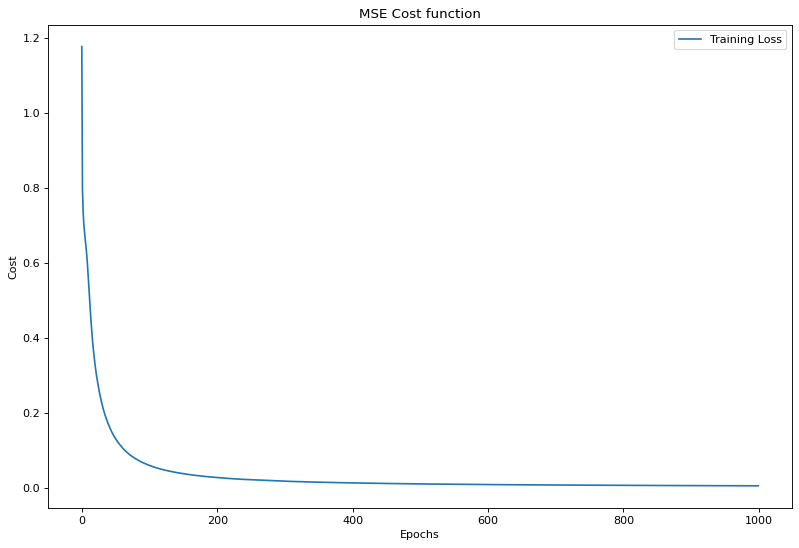

In [128]:
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

loss = history_2.history['loss']
plt.plot(loss)
plt.title('MSE Cost function')
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.legend(['Training Loss'], loc='upper right')
plt.show()

In [129]:
yhat_2 = bc_2.predict(X[:4, :])

In [131]:
yhat_2

array([[0.0087202],
       [0.0087202],
       [0.0087202],
       [0.0087202]], dtype=float32)

In [130]:
y[:4,:]

array([[0],
       [0],
       [0],
       [0]])